In [1]:
import tensorflow as tf 
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np 
import pickle 

In [2]:
img_array = cv2.imread("datasets/face-mask/00000_Mask.jpg")

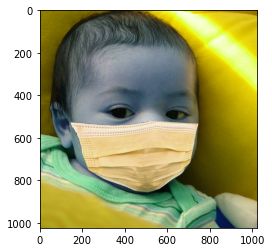

In [3]:
plt.imshow(img_array)

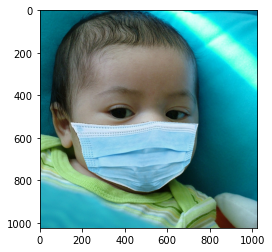

In [4]:
plt.imshow(cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB))

In [5]:
img_array.shape

(1024, 1024, 3)

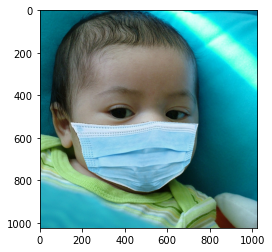

In [5]:
Datadirectory = "datasets/" ## training dataset
Classes = ["face-mask","no-mask"] #List of classes
for category in Classes:
    path = os.path.join(Datadirectory, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        #backtorgb = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break
        

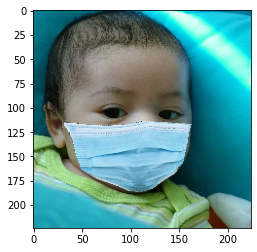

In [7]:
img_size =224   #ImageNet => 224 x 224
new_array = cv2.resize(img_array, (img_size,img_size))
plt.imshow(cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB))
plt.show()

# reading the images and converting all to array

In [8]:
training_Data = []  #Data

def create_training_Data():
    for category in Classes:
        path = os.path.join(Datadirectory,category)
        class_num = Classes.index(category) # Label
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img))
                new_array = cv2.resize(img_array,(img_size,img_size))
                training_Data.append([new_array,class_num])
            except Exeption as e:
                pass

In [9]:
create_training_Data()

In [6]:
print(len(training_Data))

1950


In [10]:
print(training_Data)

[[array([[[148, 133,   3],
        [144, 128,   1],
        [144, 128,   0],
        ...,
        [155, 119,   1],
        [152, 115,   0],
        [150, 116,   0]],

       [[147, 131,   1],
        [144, 127,   0],
        [142, 128,   0],
        ...,
        [150, 113,   0],
        [150, 113,   0],
        [150, 114,   0]],

       [[146, 131,   0],
        [144, 129,   2],
        [140, 127,   0],
        ...,
        [149, 112,   0],
        [151, 114,   0],
        [151, 113,   1]],

       ...,

       [[170, 152,  21],
        [174, 156,  25],
        [170, 153,  20],
        ...,
        [156, 155, 127],
        [160, 156, 131],
        [163, 156, 131]],

       [[165, 149,  19],
        [166, 151,  19],
        [167, 152,  19],
        ...,
        [159, 157, 133],
        [160, 155, 134],
        [163, 154, 133]],

       [[165, 147,  15],
        [165, 147,  16],
        [168, 148,  20],
        ...,
        [159, 155, 129],
        [164, 158, 135],
        [159, 155, 129

In [12]:
import random 
random.shuffle(training_Data)

In [10]:
print(training_Data)

[[array([[[ 37,  52,  78],
        [ 37,  52,  78],
        [ 37,  52,  78],
        ...,
        [ 30, 135, 125],
        [ 25, 130, 117],
        [ 23, 126, 109]],

       [[ 37,  52,  78],
        [ 37,  52,  78],
        [ 35,  51,  77],
        ...,
        [ 27, 130, 125],
        [ 27, 128, 119],
        [ 26, 124, 111]],

       [[ 35,  50,  76],
        [ 37,  51,  79],
        [ 37,  51,  79],
        ...,
        [ 22, 122, 127],
        [ 24, 122, 123],
        [ 24, 120, 114]],

       ...,

       [[ 35,  48,  74],
        [ 31,  44,  72],
        [ 32,  46,  74],
        ...,
        [ 99, 141, 178],
        [ 93, 141, 175],
        [104, 154, 182]],

       [[ 32,  41,  63],
        [ 34,  43,  71],
        [ 32,  39,  74],
        ...,
        [103, 146, 183],
        [105, 153, 187],
        [101, 153, 183]],

       [[ 21,  26,  54],
        [ 23,  23,  64],
        [ 26,  18,  82],
        ...,
        [ 98, 144, 185],
        [ 89, 142, 177],
        [ 80, 133, 166

In [13]:
x = [] #data / features
y = [] #label
for features,label in training_Data:
    x.append(features)
    y.append(label)
    
x = np.array(x).reshape(-1, img_size, img_size,3)
    

In [14]:
x.shape

(1950, 224, 224, 3)

In [13]:
x

array([[[[ 37,  52,  78],
         [ 37,  52,  78],
         [ 37,  52,  78],
         ...,
         [ 30, 135, 125],
         [ 25, 130, 117],
         [ 23, 126, 109]],

        [[ 37,  52,  78],
         [ 37,  52,  78],
         [ 35,  51,  77],
         ...,
         [ 27, 130, 125],
         [ 27, 128, 119],
         [ 26, 124, 111]],

        [[ 35,  50,  76],
         [ 37,  51,  79],
         [ 37,  51,  79],
         ...,
         [ 22, 122, 127],
         [ 24, 122, 123],
         [ 24, 120, 114]],

        ...,

        [[ 35,  48,  74],
         [ 31,  44,  72],
         [ 32,  46,  74],
         ...,
         [ 99, 141, 178],
         [ 93, 141, 175],
         [104, 154, 182]],

        [[ 32,  41,  63],
         [ 34,  43,  71],
         [ 32,  39,  74],
         ...,
         [103, 146, 183],
         [105, 153, 187],
         [101, 153, 183]],

        [[ 21,  26,  54],
         [ 23,  23,  64],
         [ 26,  18,  82],
         ...,
         [ 98, 144, 185],
        

In [14]:
y

[0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,


In [15]:
#normalize the data 
x=x/255.0

In [24]:
x[2]

array([[[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [16]:
y = np.array(y)
y.shape
print(y)

[1 1 1 ... 1 1 1]


In [16]:
y

array([0, 1, 1, ..., 1, 0, 1])

In [17]:

pickle_out = open("x.pickle","wb")
pickle.dump(x, pickle_out)
pickle_out.close()


In [20]:
pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [21]:
pickle_in = open("x.pickle","rb")
x = pickle.load(pickle_in)

In [22]:
pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

# Deep Learning model for training - Transfer Learning

In [23]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [24]:
model = tf.keras.applications.mobilenet.MobileNet() #pre-trained model

In [22]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32

_________________________________________________________________
global_average_pooling2d (Gl (None, 1024)              0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 1, 1, 1024)        0         
_________________________________________________________________
dropout (Dropout)            (None, 1, 1, 1024)        0         
_________________________________________________________________
conv_preds (Conv2D)          (None, 1, 1, 1000)        1025000   
_________________________________________________________________
reshape_2 (Reshape)          (None, 1000)              0         
_________________________________________________________________
predictions (Activation)     (None, 1000)              0         
Total params: 4,253,864
Trainable params: 4,231,976
Non-trainable params: 21,888
_________________________________________________________________


# Transfer Learning - Tuning , weights will start from last check point 

In [21]:
base_input = model.layers[0].input 

In [22]:
base_output = model.layers[-4].output

In [23]:
Flat_layer= layers.Flatten()(base_output)
final_output = layers.Dense(1)(Flat_layer) ## 0,1
final_output = layers.Activation('sigmoid')(final_output)

In [24]:
new_model = keras.Model(inputs =base_input, outputs=final_output)

In [27]:
new_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0     

# Settings for binary classification (Face mask / without mask)

In [25]:
new_model.compile(loss="binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [26]:
new_model.fit(x,y,epochs = 1,validation_split = 0.1)

55/55 [==============================] - 432s 7s/step - loss: 0.0274 - accuracy: 0.9863 - val_loss: 0.0320 - val_accuracy: 0.9949


In [ ]:
#to freeze a layer 
#for layer in model.layer:
    #layer[i].trainable = false
##
#model.layers[0].trainable = false #the weight of the layer won't be modified 

In [27]:
new_model.save('my_model.h5')

In [28]:
new_model =  tf.keras.models.load_model('my_model.h5')

# Checking the network for Predictions

In [29]:
frame = cv2.imread('00005_Mask.jpg')

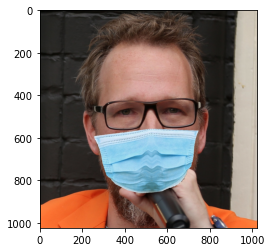

In [30]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

In [31]:
final_image = cv2.resize(frame,(224,224))
final_image = np.expand_dims(final_image,axis=0) #need fourth dimention
final_image = final_image/255.0

In [32]:
Predictions = new_model.predict(final_image)

In [33]:
Predictions

array([[1.]], dtype=float32)

# checking the network for unknown images

In [34]:
frame = cv2.imread('kid_no_mask.jpg')

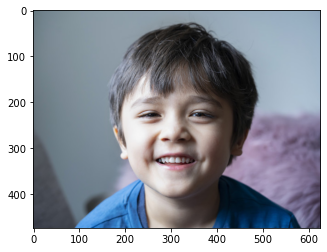

In [35]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

In [36]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml') # for face detection

In [37]:
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

In [38]:
gray.shape

(474, 626)

In [39]:
faces = faceCascade.detectMultiScale(gray,1.1,4)
for x,y,w,h in faces:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = frame[y:y+h, x:x+w]
    cv2.rectangle(frame, (x,y),(x+w,y+h), (255,0,0),2)
    facess = faceCascade.detectMultiScale(roi_gray)
    if len(facess)==0:
        print("Face not detected")
    else:
        for (ex,ey,ew,eh) in facess:
            face_roi = roi_color[ey:ey+eh, ex:ex+ew]

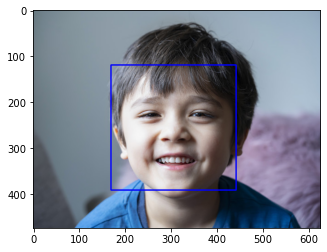

In [40]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

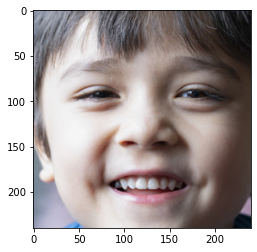

In [41]:
plt.imshow(cv2.cvtColor(face_roi, cv2.COLOR_BGR2RGB))

In [42]:
final_image = cv2.resize(face_roi,(224,224))
final_image = np.expand_dims(final_image,axis=0) #need fourth dimention
final_image = final_image/255.0

In [43]:
Predictions = new_model.predict(final_image)

In [44]:
Predictions

array([[1.]], dtype=float32)

# Face Mask Detection

In [45]:
import winsound 
frequency = 2500
duration = 1000
import cv2
path = "haarcascade_frontalface_default.xml"
font_scale =1.5
font = cv2.FONT_HERSHEY_PLAIN

#set the rectangle background to white
rectangle_bgr = (255,255,255)
# make a black image
img = np.zeros((500,500))
# set some text
text = "Some text in a box!"
# get the width and height of the text box
(text_width, text_height) = cv2.getTextSize(text, font, fontScale =font_scale, thickness=1)[0]
# set the text start position 
text_offset_x =10
text_offset_y = img.shape[0]-25
box_coords = ((text_offset_x, text_offset_y), (text_offset_x+text_width+2,text_offset_y-text_height-2))
cv2.rectangle(img, box_coords[0], box_coords[1], rectangle_bgr, cv2.FILLED)
cv2.putText(img, text, (text_offset_x,text_offset_y), font, fontScale=font_scale, color=(0,0,0), thickness=1)

cap = cv2.VideoCapture(1)
# Check if the webcam is opened correctly
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")
while True:
    ret,frame = cap.read()
    faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(gray,1.1,4)
    for x,y,w,h in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        cv2.rectangle(frame, (x,y),(x+w,y+h), (255,0,0),2)
        facess = faceCascade.detectMultiScale(roi_gray)
        if len(facess)==0:
            print("Face not detected")
        else:
            for (ex,ey,ew,eh) in facess:
                face_roi = roi_color[ey:ey+eh, ex:ex+ew]
    final_image = cv2.resize(face_roi,(224,224))
    final_image = np.expand_dims(final_image,axis=0) #need fourth dimention
    final_image = final_image/255.0
    font = cv2.FONT_HERSHEY_SIMPLEX
    Predictions = new_model.predict(final_image)
    
    font_scale = 1.5
    font = cv2.FONT_HERSHEY_PLAIN
    
    if (Predictions >0):
        status = "No Mask"
        
        x1,y1,w1,h1 = 0,0,175,75
        #Draw black background rectangle
        cv2.rectangle(frame, (x1,x1),(x1+w1,y1+h1),(0,0,0),-1)
        #add text
        cv2.putText(frame,status,(x1+ int(w1/10),y1+int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255), 2)
        
        cv2.putText(frame,status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
        
        cv2.rectangle(frame, (x,y), (x+w,y+h),(0,0,255))
        winsound.Beep(frequency,duration)
    else:
        status = "Face Mask"
        
        x1,y1,w1,h1 = 0,0,175,75
        #Draw black background rectangle
        cv2.rectangle(frame, (x1,x1),(x1+w1,y1+h1),(0,0,0),-1)
        #add text
        cv2.putText(frame,status,(x1+ int(w1/10),y1+int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,255,0), 2)
        cv2.putText(frame,status,(100,150),font,3,(0,255,0),2,cv2.LINE_4)
        cv2.rectangle(frame, (x,y), (x+w,y+h),(0,255,0))
        
    cv2.imshow('Face Mask Detection Tutorial',frame)
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()
        
        
    
                

Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected


KeyboardInterrupt: 